In [0]:
# setup
!wget https://swcarpentry.github.io/python-novice-inflammation/data/python-novice-inflammation-data.zip
!wget https://swcarpentry.github.io/python-novice-inflammation/code/python-novice-inflammation-code.zip

!unzip -jn python-novice-inflammation-data.zip
!unzip -jn python-novice-inflammation-code.zip

All materials are from [Software Carpentry Lesson 3](https://swcarpentry.github.io/python-novice-inflammation/03-matplotlib/index.html)

# Visualizing Tabular Data

## Visualizing Data

The mathematician Richard Hamming once said, “The purpose of computing is insight, not numbers,” and the best way to develop insight is often to visualize data. Visualization deserves an entire lecture of its own, but we can explore a few features of Python’s `matplotlib` library here. While there is no official plotting library, `matplotlib` is the de facto standard. First, we will import the `pyplot` module from `matplotlib` and use two of its functions to create and display a heat map of our data:


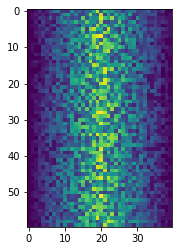

In [3]:
import numpy
import matplotlib.pyplot

data = numpy.loadtxt(fname='inflammation-01.csv', delimiter=',') # from lesson 2
image = matplotlib.pyplot.imshow(data)
matplotlib.pyplot.show()

Blue pixels in this heat map represent low values, while yellow pixels represent high values. As we can see, inflammation rises and falls over a 40-day period. Let’s take a look at the average inflammation over time:

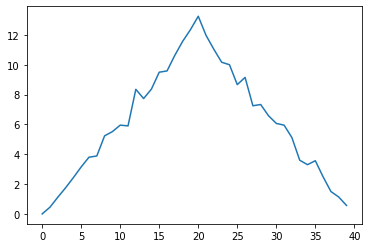

In [4]:
ave_inflammation = numpy.mean(data, axis=0)
ave_plot = matplotlib.pyplot.plot(ave_inflammation)
matplotlib.pyplot.show()

Here, we have put the average inflammation per day across all patients in the variable `ave_inflammation`, then asked `matplotlib.pyplot` to create and display a line graph of those values. The result is a roughly linear rise and fall, which is suspicious: we might instead expect a sharper rise and slower fall. Let’s have a look at two other statistics:



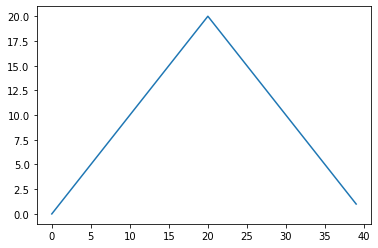

In [5]:
max_plot = matplotlib.pyplot.plot(numpy.max(data, axis=0))
matplotlib.pyplot.show()

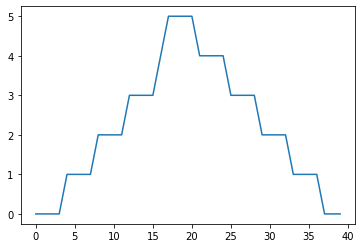

In [6]:
min_plot = matplotlib.pyplot.plot(numpy.min(data, axis=0))
matplotlib.pyplot.show()

The maximum value rises and falls smoothly, while the minimum seems to be a step function. Neither trend seems particularly likely, so either there’s a mistake in our calculations or something is wrong with our data. This insight would have been difficult to reach by examining the numbers themselves without visualization tools.

# Grouping plots

You can group similar plots in a single figure using subplots. This script below uses a number of new commands. The function `matplotlib.pyplot.figure()` creates a space into which we will place all of our plots. The parameter `figsize` tells Python how big to make this space. Each subplot is placed into the figure using its `add_subplot` [method](https://swcarpentry.github.io/python-novice-inflammation/reference/#method). The `add_subplot` method takes 3 parameters. The first denotes how many total rows of subplots there are, the second parameter refers to the total number of subplot columns, and the final parameter denotes which subplot your variable is referencing (left-to-right, top-to-bottom). Each subplot is stored in a different variable (`axes1`, `axes2`, `axes3`). Once a subplot is created, the axes can be titled using the `set_xlabel()` command (or `set_ylabel()`). Here are our three plots side by side:

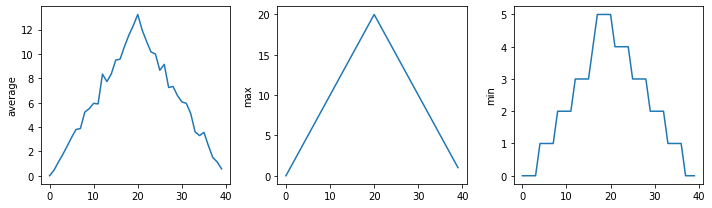

In [7]:
import numpy
import matplotlib.pyplot

data = numpy.loadtxt(fname='inflammation-01.csv', delimiter=',')

fig = matplotlib.pyplot.figure(figsize=(10.0, 3.0))

axes1 = fig.add_subplot(1, 3, 1)
axes2 = fig.add_subplot(1, 3, 2)
axes3 = fig.add_subplot(1, 3, 3)

axes1.set_ylabel('average')
axes1.plot(numpy.mean(data, axis=0))

axes2.set_ylabel('max')
axes2.plot(numpy.max(data, axis=0))

axes3.set_ylabel('min')
axes3.plot(numpy.min(data, axis=0))

fig.tight_layout()

matplotlib.pyplot.show()

The [call](https://swcarpentry.github.io/python-novice-inflammation/reference/#function-call) to `loadtxt` reads our data, and the rest of the program tells the plotting library how large we want the figure to be, that we’re creating three subplots, what to draw for each one, and that we want a tight layout. (If we leave out that call to `fig.tight_layout()`, the graphs will actually be squeezed together more closely.)

# Exercise: Plot Scaling

Why do all of our plots stop just short of the upper end of our graph?

If we want to change this, we can use the `set_ylim(min, max)` method of each ‘axes’, for example:

```
axes3.set_ylim(0,6)
```
Update your plotting code to automatically set a more appropriate scale. (Hint: you can make use of the `max` and `min` methods to help.)

# Exercise: Drawing Straight Lines
In the center and right subplots above, we expect all lines to look like step functions because non-integer value are not realistic for the minimum and maximum values. However, you can see that the lines are not always vertical or horizontal, and in particular the step function in the subplot on the right looks slanted. Why is this?

# Exercise: Make Your Own Plot
Create a plot showing the standard deviation (`numpy.std`) of the inflammation data for each day across all patients.

# Exercise: Moving Plots Around
Modify the program to display the three plots on top of one another instead of side by side.

# Key Points

* Use the `pyplot` module from the matplotlib library for creating simple visualizations.